# Model AND gate with single neuron

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Xvalue = np.array([[0, 0], 
                   [0, 1],
                   [1, 0],
                   [1, 1]])
yvalue = np.array([[0], 
                   [0], 
                   [0], 
                   [1]])
# yvalue = np.array([[0], 
#                    [1], 
#                    [1], 
#                    [1]])

In [3]:
X = tf.placeholder(tf.float32, [4, 2], name="X")
y = tf.placeholder(tf.float32, [4, 1], name="y")

In [4]:
W = tf.Variable(tf.random_normal([2, 1]), name="W")
b = tf.Variable(tf.random_normal([1, 1]), name="b")

In [5]:
y_ = tf.nn.sigmoid(tf.matmul(X, W) + b, name="y_")
loss = tf.reduce_mean(0.5 * tf.pow(y_ - y, 2), name="loss")

In [6]:
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [7]:
losses = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(10000):
        _, yval_, lossval = sess.run([optimizer, y_, loss], 
                                     feed_dict={X: Xvalue, y: yvalue})
        losses.append(lossval)
    print("predictions")
    print(yval_)
    print("weights")
    Wval, bval = sess.run([W, b])
    print(Wval)
    print(bval)

predictions
[[ 0.00333084]
 [ 0.12228683]
 [ 0.12228554]
 [ 0.85311973]]
weights
[[ 3.7303648 ]
 [ 3.73037672]]
[[-5.7013917]]


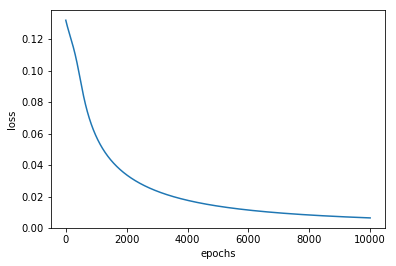

In [8]:
plt.plot(np.arange(len(losses)), losses)
plt.xlabel("epochs")
plt.ylabel("loss")